In [1]:
import os, glob, math, operator
import ROOT as ROOT
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad, TFile, TGraphAsymmErrors,TLatex,TLine,gStyle,TLegend,gROOT,TGraph
from ROOT import kBlack, kBlue, kRed
from array import array
import matplotlib.pyplot as plt, numpy as np
from matplotlib import text
from matplotlib.colors import LogNorm
import datetime
import pandas as pd 

def SetCanvas():
    c = ROOT.TCanvas("myCanvasName", "The Canvas Title", 650, 600)
    c.SetBottomMargin(0.050)
    c.SetRightMargin(0.050)
    c.SetLeftMargin(0.050)
    c.SetTopMargin(0.050)
    return c

def SetCMSAxis(h, xoffset=1., yoffset=1.):
    h.GetXaxis().SetTitleSize(0.047)
    h.GetYaxis().SetTitleSize(0.047)

    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetTitleSize(0.047)

    h.GetXaxis().SetLabelSize(0.047)
    h.GetYaxis().SetLabelSize(0.047)
    if type(h) is ( (not ROOT.TGraphAsymmErrors) or (not ROOT.TGraph)):
        h.GetZaxis().SetLabelSize(0.047)

    h.GetXaxis().SetTitleOffset(xoffset)
    h.GetYaxis().SetTitleOffset(yoffset)
    
    return h

def SetLegend(coordinate_=[.50,.65,.90,.90],ncol=2):
    c_=coordinate_
    legend=ROOT.TLegend(c_[0], c_[1],c_[2],c_[3])
    legend.SetBorderSize(0)
    legend.SetNColumns(ncol)
    legend.SetLineColor(1)
    legend.SetLineStyle(1)
    legend.SetLineWidth(1)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.040)
    return legend


def drawenergy1D(is2017, text_="Work in progress 2018", data=True):
    #pt = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt.SetBorderSize(0)
    pt.SetTextAlign(12)
    pt.SetFillStyle(0)
    pt.SetTextFont(52)

    cmstextSize = 0.07
    preliminarytextfize = cmstextSize * 0.7
    lumitextsize = cmstextSize *0.7
    pt.SetTextSize(cmstextSize)
    text = pt.AddText(0.03,0.57,"#font[60]{CMS}")

    #pt1 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt1 = ROOT.TPaveText(0.0877181,0.95,0.9580537,0.96,"brNDC")
    pt1.SetBorderSize(0)
    pt1.SetTextAlign(12)
    pt1.SetFillStyle(0)
    pt1.SetTextFont(52)

    pt1.SetTextSize(preliminarytextfize)
    #text1 = pt1.AddText(0.215,0.4,text_)
    text1 = pt1.AddText(0.15,0.4,text_)

    #pt2 = ROOT.TPaveText(0.0877181,0.9,0.9580537,0.96,"brNDC")
    pt2 = ROOT.TPaveText(0.0997181,0.95,0.9580537,0.96,"brNDC")
    pt2.SetBorderSize(0)
    pt2.SetTextAlign(12)
    pt2.SetFillStyle(0)
    pt2.SetTextFont(52)
    pt2.SetTextFont(42)
    pt2.SetTextSize(lumitextsize)

    pavetext = ''
    if is2017 and data: pavetext = str(luminosity_)+' fb^{-1}'+" (13 TeV)"
    if (not is2017) and data: pavetext = str(luminosity_)+' fb^{-1}'+"(13 TeV)"

    if is2017 and not data: pavetext = "13 TeV"
    if (not is2017) and not data: pavetext = "13 TeV"

    if data: text3 = pt2.AddText(0.68,0.5,pavetext)
    if not data: text3 = pt2.AddText(0.85,0.5,pavetext)

    return [pt,pt1,pt2]

def getLatex():
    latex =  TLatex()
    latex.SetNDC();
    latex.SetTextSize(0.04);
    latex.SetTextAlign(31);
    latex.SetTextAlign(11);
    latex.SetTextColor(1);
    return latex

def upperPAD():
    c1_1 = ROOT.TPad("c1_1", "c1_1", 0., 0.25, 1., 1.)
    c1_1.SetBottomMargin(0.0)
    c1_1.SetTopMargin(0.10)
    c1_1.SetLeftMargin(0.15)
    c1_1.SetRightMargin(0.05)
    c1_1.SetLogy(1)
    c1_1.SetGrid()
    c1_1.Draw()
    c1_1.cd()
    return c1_1

def lowerPAD():
    c1_2 = ROOT.TPad("c1_2", "c1_2", 0., 0., 1., 0.25)
    c1_2.SetLeftMargin(0.15)
    c1_2.SetRightMargin(0.05)
    c1_2.SetTopMargin(0.00)
    c1_2.SetBottomMargin(0.40)
    c1_2.SetGrid()
    c1_2.Draw()
    c1_2.cd()
    return c1_2

def getGraph(n,x,y,lc,mc,ms):
    gr =TGraph(n,x,y)
    gr.SetFillColor(4)
    #gr.SetFillStyle(3004)
    gr.SetLineColor(4)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1.5)
    gr.SetLineColor(lc)
    gr.SetLineWidth(1)
    gr.SetMarkerColor(mc)
    gr.GetYaxis().SetTitle("Signal Efficiency")
    gr.GetXaxis().SetTitle("M_{a} (GeV)")
    return gr
    
def getHisto(hist,ls,lc,mc,ms):
    gr = hist#.Clone('gr')
    gr.SetLineStyle(ls)
    gr.SetLineWidth(2)
    gr.SetMarkerStyle(ms)
    gr.SetMarkerSize(1)
    gr.SetLineColor(lc)
    gr.SetMarkerColor(mc)
    return gr


Welcome to JupyROOT 6.22/06


Info in <TCanvas::Print>: pdf file PDFnSCALE_SMH_2017.pdf has been created
Info in <TCanvas::Print>: png file PDFnSCALE_SMH_2017.png has been created


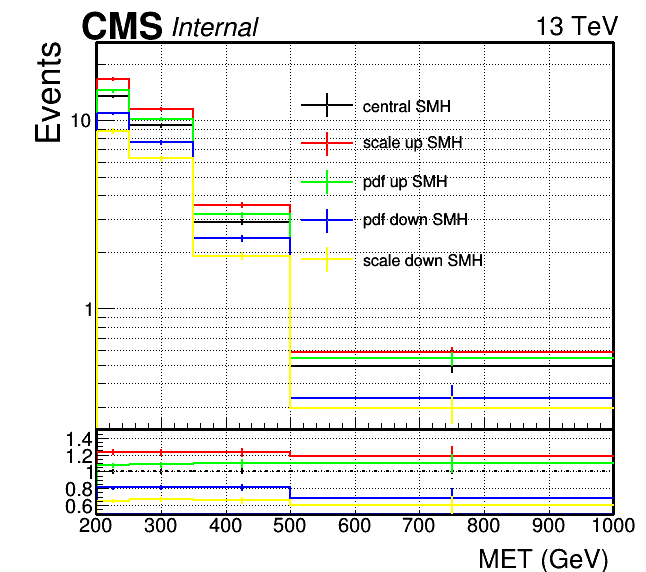

In [2]:
gStyle.SetErrorX(0.5)
gStyle.SetFrameLineWidth(3)
gStyle.SetOptTitle(0)
gStyle.SetOptStat(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetFillColor(2)
gStyle.SetLineWidth(1)
gStyle.SetHistFillStyle(0)
gROOT.SetBatch(True)
sig_plots = {}

ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetErrorX(0.)
ROOT.gROOT.SetBatch(True)
ROOT.gStyle.SetGridStyle();
ROOT.gROOT.ForceStyle() 

datestr = str(datetime.date.today().strftime("%d%m%Y"))
luminosity_1 = '{0:.2f}'.format(41.5)
luminosity_2 = '{0:.2f}'.format(35.81)


## ma100_mA600
# xsec1 =  0.0257900
# xsec2 = 0.1394

## ma100_mA600
# xsec1 =  0.4232
# xsec2 = 14.85

## Ma150_MChi1_MA600
xsec1 = 0.282800
xsec2 = 5.746000
files = {}
plots ={}
plots_tot ={}
lumi = {}
xsec = {}

# pf = '/Users/ptiwari/cernBox/Documents/ExoPieCapper/plots_norm/v16_08-00-00/bbDMRoot'
# no_pf = '/Users/ptiwari/cernBox/Documents/ExoPieCapper/plots_norm/v17_08_00_00_noprefire/bbDMRoot'
pf = '/Users/ptiwari/Documents/bbDM/ExoPieUtils/scalefactortools/data_2016/'

# files['central'] = ROOT.TFile(pf+'/h_reg_SR_2b_MET.root')
# files['pdf_down'] = ROOT.TFile(pf+'/h_reg_SR_2b_MET_weightpdf_down.root')
# files['pdf_up'] = ROOT.TFile(pf+'/h_reg_SR_2b_MET_weightpdf_up.root')
# files['scale_down'] = ROOT.TFile(pf+'/h_reg_SR_2b_MET_weightscale_down.root')
# files['scale_up'] = ROOT.TFile(pf+'/h_reg_SR_2b_MET_weightscale_up.root')

file['MET Trigger'] = ROOT.TFile(pf+'2016_MET_Trigger_SF_R.root')

pl = 'SMH'
# pl = 'Ma150_MChi1_MA600'
#pl = 'Ma500_MChi1_MA600'


plots['central_'+pl] = files['central'].Get(pl)
plots['scale_up_'+pl] = files['scale_up'].Get(pl)
plots['pdf_up_'+pl] = files['pdf_up'].Get(pl)
plots['pdf_down_'+pl] = files['pdf_down'].Get(pl)
plots['scale_down_'+pl] = files['scale_down'].Get(pl)

lumi['2017'] = luminosity_1
lumi['2016'] = luminosity_2

xsec['2017'] = xsec1
xsec['2016'] = xsec2

c1 = SetCanvas()
##Upper PAD##
c1_1 = upperPAD()
legend = SetLegend([.45,.35,.90,.80],ncol=1)
# legend = SetLegend([.50,.38,.95,.65],ncol=1)
ls,lc,mc,ms = 1,1,1,1
for key in plots:
    histo = getHisto(plots[key],ls,lc,20+mc,ms)
    histo = SetCMSAxis(histo)
    legend.AddEntry(histo,str(key).replace('_',' '),"PEL")
    lc+=1;mc+=1;mc+=1
    histo.GetYaxis().SetTitle("Events")
    histo.GetXaxis().SetTitle("MET (GeV)")
    histo.GetYaxis().SetTitleSize(0.085)
    histo.GetYaxis().SetTitleOffset(0.55)
    histo.Draw("Hist E0 same")
legend.Draw('L same')
c1_1.Update()
c1.cd()

##Lower PAD##
c1_2 = lowerPAD()
draw_opts="hist e0"
stack = ROOT.THStack()
for key in plots:
    if 'central' in key:
        syst_h = plots[key].Clone('syst_h')
        syst_h.Divide(plots[key])
        syst_h.SetLineStyle(4)
    else:
        if '_up_' in key:nKey = 'central_'+key.partition('_up_')[-1]
        elif '_down_' in key:nKey = 'central_'+key.partition('_down_')[-1]
        syst_h = plots[key].Clone('syst_h')
        syst_h.Divide(plots[nKey])
    stack.Add(syst_h)
    lc+=1;mc+=1;mc+=1

stack.Draw("nostack" + draw_opts)
stack.GetYaxis().SetTitleOffset(1)
stack.GetXaxis().SetTitleSize(0.20)
stack.GetXaxis().SetLabelSize(0.15)
stack.GetYaxis().SetLabelSize(0.15)
stack.GetXaxis().SetTitle("MET (GeV)")
stack.SetMaximum(1.51)
stack.SetMinimum(0.49) 
c1_2.Update()
c1.cd()   
pt = drawenergy1D(True,text_="    Internal",data=False)
for ipt in pt: ipt.Draw()
latex=getLatex()
c1.Update()
c1.Draw()
c1.SaveAs('PDFnSCALE_'+pl+'_2016.pdf')
c1.SaveAs('PDFnSCALE_'+pl+'_2016.png')